Step by Step in creating machine learning

1 . Getting the data ready

2 . Chooose the right estimator /algorithm for our problems

3 . Fit the model/algorithm and use it to make predictions on the data

4 .  Evaluating a model 

5 .  Improve a model

6 . Save and load a model

7 . Putting it all together 

In [1]:
import pandas as pd
import numpy as np

# **Step 1**

In [2]:
#Getting the data ready
heart_disease = pd.read_csv('heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
#create x (features matrix)

x = heart_disease.drop('target', axis = 1)

#create y (labels matrix)

y = heart_disease.target

# **Step 2**

In [4]:
# 2. choose the right model and hyperparamters
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

#We will keep the default hyperparameters

clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

# **Step 3**

In [5]:
# 3 . Fit the model to the training data
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split( x, y ,
                                                       test_size=0.2)

In [6]:
# telling the classification model random forest find the patterns in the training data
clf.fit(x_train, y_train)

RandomForestClassifier()

In [7]:
#predictions = clf.predict(np.array[0,2,3,4])


In [8]:
#make predictions
prediction = clf.predict(x_test)
prediction

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0], dtype=int64)

In [9]:
y_test

9      1
278    0
115    1
280    0
210    0
      ..
163    1
239    0
262    0
65     1
175    0
Name: target, Length: 61, dtype: int64

# **Step 4**

In [1]:
#Evalute the model on the training data test data
# we evaluate how good the predictions or how well the machine learning model we 
#trained our random forest classifier on , has done learning on the training data using the metrics
#score (), classification_report() , accuracy_score()


clf.score(x_train, y_train)





NameError: name 'clf' is not defined

In [11]:
clf.score(x_test,y_test)

0.8360655737704918

In [12]:
from sklearn.metrics import classification_report ,  confusion_matrix, accuracy_score

print(classification_report(y_test,prediction))
tn, fp, fn, tp = confusion_matrix(y_test,prediction).ravel()

              precision    recall  f1-score   support

           0       0.91      0.71      0.80        28
           1       0.79      0.94      0.86        33

    accuracy                           0.84        61
   macro avg       0.85      0.83      0.83        61
weighted avg       0.85      0.84      0.83        61



In [13]:
#Accuracy KPI
accuracy = (tp + tn) / (tn + fp + fn + tp)
print('Accuracy' , round(accuracy * 100 , 1) , '%')

#F1-Score

f1 = 2 * tp / (2 * tp + fn + fp)
print('F1 - Score :' , round(f1 * 100 , 1) , "%")

#Specificity /true negative

specificity = tn / (tn + fp)
print('Specificity (True Negative) :' , round(specificity * 100, 1), "%")

#Sensitivit / True positives
sensitivity = tp / (tp + fn)
print ('Sensitivity (True Positive):' , round(sensitivity * 100 ,1), "%")

Accuracy 83.6 %
F1 - Score : 86.1 %
Specificity (True Negative) : 71.4 %
Sensitivity (True Positive): 93.9 %


# **Step 5**

In [14]:
#Improve the model
#Try different amount of n_estimators

np.random.seed(42)
for i in range(10, 100 , 10):
    print(f'Trying  model with {i} estimators......')
    clf = RandomForestClassifier(n_estimators = i).fit(x_train,y_train)
    print(f'Model accuracy on test set : {clf.score(x_test,y_test) * 100:.2f} % ')
    print('')


Trying  model with 10 estimators......
Model accuracy on test set : 85.25 % 

Trying  model with 20 estimators......
Model accuracy on test set : 75.41 % 

Trying  model with 30 estimators......
Model accuracy on test set : 81.97 % 

Trying  model with 40 estimators......
Model accuracy on test set : 86.89 % 

Trying  model with 50 estimators......
Model accuracy on test set : 80.33 % 

Trying  model with 60 estimators......
Model accuracy on test set : 80.33 % 

Trying  model with 70 estimators......
Model accuracy on test set : 83.61 % 

Trying  model with 80 estimators......
Model accuracy on test set : 81.97 % 

Trying  model with 90 estimators......
Model accuracy on test set : 81.97 % 



# **Step 6**

In [15]:
#save the model and load the model
import pickle

pickle.dump(clf , open('random_forest_model_1.pkl' , 'wb'))


In [16]:
load_model = pickle.load(open('random_forest_model_1.pkl' , 'rb'))
load_model.score(x_test, y_test)

0.819672131147541

# **Going through the process again step by step**

1.1 Make sure all dataset is numerical 

In [17]:
car_analysis = pd.read_csv('car-sales-extended.csv')
car_analysis.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [18]:
len(car_analysis)

1000

In [19]:
car_analysis.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [20]:
#split x and y
x = car_analysis.drop('Price' , axis=1)
y = car_analysis.Price

In [21]:
#split into training and testing
x_train ,x_test ,y_train ,y_test = train_test_split(x, y ,
                                                    test_size=0.2)

In [22]:
#Build machine learning model
from sklearn.ensemble import  RandomForestRegressor
model = RandomForestRegressor()
# model.fit(x_train ,y_train)
# model.score(x_test,y_test)

In [23]:
x.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


# **One Hot Encoding**

In [24]:
#Turn the categories into numbers
#One Hot Encoding : a process used to turn categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categories_features = ['Make' , 'Colour' , 'Doors']
one_hot = OneHotEncoder()
tranformer = ColumnTransformer([('one_hot',
                                  one_hot,
                                  categories_features)],
                                  remainder = 'passthrough')

transformed_x = tranformer.fit_transform(x)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [25]:
x.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [26]:
pd. DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [27]:
dummies = pd.get_dummies(car_analysis[['Make', 'Colour' , 'Doors']] , dtype='int')
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [28]:
#Lets refit the model
np.random.seed(42)
x_train, x_test ,y_train ,y_test = train_test_split(transformed_x , y ,
                                                    test_size= 0.2)

model.fit(x_train,y_train)

RandomForestRegressor()

In [29]:
model.score(x_test ,y_test)

0.3235867221569877

1 . 2 What if there were misssing values? 

In [30]:
#Import car sales misssing data
car_analysis_missing = pd.read_csv('car-sales-extended-missing-data.csv')
car_analysis_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [31]:
car_analysis_missing.isnull().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

Optional 1 . Filling missing with pandas

In [32]:
car_analysis_missing.Make.fillna('missing' , inplace=True)
car_analysis_missing.Colour.fillna('missing' , inplace=True)
car_analysis_missing['Odometer (KM)'].fillna(car_analysis_missing['Odometer (KM)'].mean() , inplace=True)
car_analysis_missing.Doors.fillna(4 , inplace=True)


C:\Users\toy\AppData\Local\Temp\ipykernel_1996\1049540896.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  car_analysis_missing.Make.fillna('missing' , inplace=True)
C:\Users\toy\AppData\Local\Temp\ipykernel_1996\1049540896.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

In [33]:
car_analysis_missing.isnull().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [34]:
#Remove rows with missing Price value
car_analysis_missing.dropna(inplace= True)

In [35]:
car_analysis_missing.isnull().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [36]:
#create x and y
x =  car_analysis_missing.drop('Price' , axis=1)
y = car_analysis_missing.Price

In [37]:
#lets try and convert our data into numbers

#Turn the categories into numbers
#One Hot Encoding : a process used to turn categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categories_features = ['Make' , 'Colour' , 'Doors']
one_hot = OneHotEncoder()
tranformer = ColumnTransformer([('one_hot',
                                  one_hot,
                                  categories_features)],
                                  remainder = 'passthrough')

transformed_x = tranformer.fit_transform(x)
transformed_x

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [38]:
#Now we got our data as numbers and filled (no missing values)
#lets fit  a model

np.random.seed(42)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

x_train, x_test ,y_train ,y_test = train_test_split(transformed_x , y ,
                                                    test_size= 0.2)

model = RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.22011714008302485

 # **2 . Choosing the right estimator/algorithm for our problem**

Sci-kit learn uses estimator as another term for machine learning model or algorithm

Problem identification

Classification - predicting whether a sample is one thing or another

Regression - predicting a number (ex a price , house price )

2 . 1 Picking a machine learning model for a regression problem

In [39]:
#import boston housing dataset

from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [40]:
housing_df = pd.DataFrame(housing['data'] , columns = housing['feature_names'])
housing_df['target'] = pd.Series(housing['target'])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [41]:
#lets try the ridge regression model 
from sklearn.linear_model import Ridge
 
#create random seed
np.random.seed(42)

#create the data
x = housing_df.drop('target' , axis=1)
y = housing_df.target

#training and testing the model

x_train , x_test , y_train , y_test = train_test_split( x ,y ,
                                                       test_size=0.2)

#Instantiate the model
model = Ridge()
model.fit(x, y)

#check the  score of the ridge regression  on test data
model.score(x_test ,y_test)

0.5833217438299314

How do we improve the score ?

What if Ridge wasn't working?

Lets refer to the sci-kit learning map https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [42]:
#lets try the random forest regressor

from sklearn.ensemble import RandomForestRegressor

np.random.seed (42)

x = housing_df.drop('target' , axis=1)
y = housing_df.target

#x_train ,x_test , y_train ,y_test = train_test_split(x ,y , 
#                                                     test_size=0.2)

model = RandomForestRegressor()
model.fit(x_train ,y_train)
model.score(x_test,y_test)

0.8046248990761814

2 . 2 Chossing an estimator for a classification problem

Lets go to the map https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [43]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [44]:
from sklearn import svm

x = heart_disease.drop('target' , axis=1)
y = heart_disease.target

x_train , x_test , y_train , y_test = train_test_split( x, y ,  test_size=0.2)

clf = svm.SVC()
clf.fit(x_train ,y_train)
clf.score(x_test,y_test)

0.7377049180327869

In [45]:
from sklearn.ensemble import RandomForestClassifier
x = heart_disease.drop('target' , axis=1)
y = heart_disease.target

x_train , x_test , y_train , y_test = train_test_split( x, y ,  test_size=0.2)
model = RandomForestClassifier()
model.fit(x_train, y_train)
model.score(x_test,y_test)


0.8688524590163934

# **Tidbit**

*   `If you have structured data ,use ensemble methods`

*   `If you have unstructured data , use deep learning and transfer learning`

# **3 . Fitting our model/algorith and use it to make prediction**


Difference names for :

*  'x' = features , features variables , data
*  'y' = labels ,targets ,targets names

3 . 1 Fitting the model to the data

In [46]:
from sklearn.ensemble import RandomForestClassifier
x = heart_disease.drop('target' , axis=1)
y = heart_disease.target

x_train , x_test , y_train , y_test = train_test_split( x, y ,  test_size=0.2)
model = RandomForestClassifier()

#Fit the model to the data(training the machine learning model (finding the patterns in the training data))
model.fit(x_train, y_train)

#Evaluate the Random Forest Classifier (use the patterns the model has learn)
model.score(x_test,y_test)

0.7540983606557377

3 . 2 Make predictions using machine learning model

2 ways to make predictions

* predict function (predict())
* predict_proba()

In [47]:
#Use a trained model to make predictions
model.predict(x_test)

array([0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0], dtype=int64)

In [48]:
np.array([y_test])

array([[0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
        1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
        0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0]], dtype=int64)

In [49]:
#compare predictions to truth label to evalute the model
y_preds = model.predict(x_test)
np.mean(y_preds == y_test)

0.7540983606557377

In [50]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preds)

0.7540983606557377

Making predictions with predict_proba()

In [51]:
#predict_proba() returns the probabilities of a classification model
model.predict_proba(x_test[:5])

array([[0.96, 0.04],
       [0.  , 1.  ],
       [0.46, 0.54],
       [0.13, 0.87],
       [0.15, 0.85]])

In [52]:
model.predict(x_test[:5])

array([0, 1, 1, 1, 1], dtype=int64)

Making predictions with our regression model 


In [53]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [54]:
from sklearn.ensemble import RandomForestRegressor
x = housing_df.drop('target' , axis=1)
y = housing_df.target

x_train , x_test , y_train , y_test = train_test_split( x, y ,  test_size=0.2)
model = RandomForestRegressor()

#Fit the model to the data(training the machine learning model (finding the patterns in the training data))
model.fit(x_train, y_train)

#Evaluate the Random Forest Classifier (use the patterns the model has learn)
model.score(x_test,y_test)

#make predictions
y_preds = model.predict(x_test)



In [55]:
y_preds

array([3.3183511, 1.98083  , 3.0120901, ..., 3.1577826, 2.5818411,
       1.94268  ])

In [56]:
np.array(y_test[:10])

array([2.883  , 1.711  , 3.185  , 2.156  , 2.299  , 1.741  , 1.371  ,
       5.00001, 0.713  , 5.00001])

In [57]:
#compare the predictions to the truth 
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_preds)

0.32289880625000017

# **4 . Evaluating a Machine Learning Model**


Three ways to evaluate scikit-learn models /estimators

1 . Estimator 'score' method

2 . The 'score' parameter

3 . Problem-specific metric function



4 . 1 Evaluating a model with the 'score' method

In [58]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop('target' , axis=1)
y = heart_disease['target']

x_train , x_test , y_train , y_test = train_test_split (x , y , test_size= 0.2)

clf = RandomForestClassifier()

clf.fit(x_train , y_train)



RandomForestClassifier()

In [59]:
clf.score(x_train ,y_train)

1.0

In [60]:
clf.score(x_test , y_test)

0.8524590163934426

Lets do the same but for regression.....

In [61]:
from sklearn.ensemble import RandomForestRegressor
x = housing_df.drop('target' , axis=1)
y = housing_df.target

x_train , x_test , y_train , y_test = train_test_split( x, y ,  test_size=0.2)
model = RandomForestRegressor()

#Fit the model to the data(training the machine learning model (finding the patterns in the training data))
model.fit(x_train, y_train)





RandomForestRegressor()

In [62]:
model.score(x_test , y_test)

0.8099115593773317

4 . 2 Evaluating a model using 'scoring' parameter

In [63]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop('target' , axis=1)
y = heart_disease['target']

x_train , x_test , y_train , y_test = train_test_split (x , y , test_size= 0.2)

clf = RandomForestClassifier()

clf.fit(x_train , y_train)



RandomForestClassifier()

In [64]:
clf.score(x_test ,y_test)

0.8524590163934426

In [65]:
cross_val_score(clf , x, y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [66]:
np.random.seed(42)

#Single training and test split score
clf_single_score = clf.score(x_test , y_test)

#Take the mean of 5-fold cross-validation score

clf_cross_var_score = np.mean(cross_val_score(clf , x, y))

#compare the two

clf_single_score , clf_cross_var_score

(0.8524590163934426, 0.8248087431693989)

In [67]:
#Default scoring parameter of classifier = mean accuracy
#clf.score()

In [68]:
#Scoring parameter set to None by default

cross_val_score(clf , x, y , scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

# **4 . 2 . 1 Classification model evaluation metrics**

1 . Accuracy

2 . Area under ROC Curve

3 . Confusion Matrix

4 . Classification Report

# **Accuracy**

In [69]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [70]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop('target'  , axis=1)
y = heart_disease.target

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2)

clf = RandomForestClassifier()

clf.fit(x_train , y_train)

clf_cross_var_score = cross_val_score(clf, x, y)

In [71]:
np.mean(clf_cross_var_score)

0.811639344262295

In [72]:
print (f"Heart Disease Classifier Cross-Validation Accuracy : {np.mean (clf_cross_var_score) * 100:.2f} %")

Heart Disease Classifier Cross-Validation Accuracy : 81.16 %


 # **Area under the receiver operating characteristics curve (AUC/ROC)**

* Area Under Curve (AUC)
* Roc Curve (ROC)

Roc Curves are the comparison of a model's true positive rate (tpr) versus a model's false positive rate (fpr)

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = models predicts 0 when truth is 1

In [73]:
from sklearn.metrics import roc_curve

#Make Predictions with Probabilities

y_probs = clf.predict_proba(x_test)
y_probs[:10]

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82],
       [0.14, 0.86],
       [0.36, 0.64],
       [0.95, 0.05],
       [0.99, 0.01],
       [0.47, 0.53]])

In [74]:
y_probs_positive = y_probs[: ,1]
y_probs_positive

array([0.11, 0.51, 0.57, 0.16, 0.82, 0.86, 0.64, 0.05, 0.01, 0.53, 0.74,
       0.3 , 0.89, 0.05, 0.97, 0.98, 0.99, 0.16, 0.05, 0.02, 0.49, 0.11,
       0.62, 0.71, 0.74, 0.66, 0.8 , 0.78, 0.17, 0.85, 0.06, 0.08, 0.04,
       0.38, 0.54, 0.11, 0.56, 0.84, 0.67, 0.92, 0.87, 0.83, 0.82, 0.62,
       0.68, 0.23, 0.61, 1.  , 0.17, 0.03, 0.15, 0.2 , 0.75, 0.75, 0.13,
       0.07, 0.29, 0.99, 0.13, 0.  , 0.14])

In [75]:
#Calculate fpr , tpr and thresholds

fpr , tpr , thresholds = roc_curve(y_test, y_probs_positive)

#check the false positive rate
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03448276, 0.03448276, 0.03448276, 0.03448276, 0.06896552,
       0.06896552, 0.10344828, 0.13793103, 0.13793103, 0.17241379,
       0.17241379, 0.27586207, 0.4137931 , 0.48275862, 0.55172414,
       0.65517241, 0.72413793, 0.72413793, 0.82758621, 1.        ])

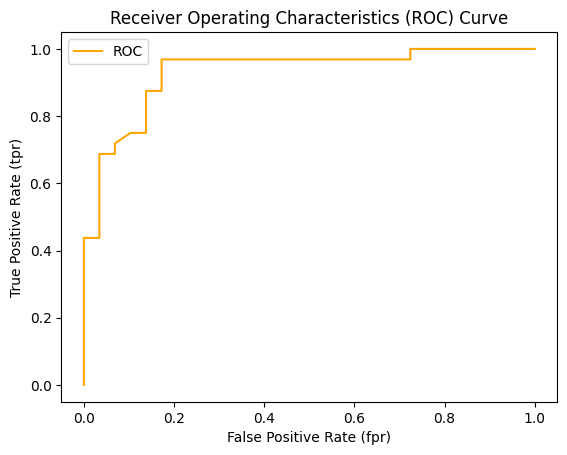

In [76]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr , tpr):
    '''
    Plots a ROC curve given the false positive rate (fpr) and
    true positive rate (tpr) of a model.
    
    '''
    plt.plot(fpr , tpr , color = 'orange' , label= 'ROC')
    
    #plot line with no predictive power (baseline)
    #plt.plot([0,1] , [0,1] , color = 'darkblue' , linestyle = '--' , label = 'Guessing')
    
    #Customize the plot
    plt.xlabel("False Positive Rate (fpr)")
    plt.ylabel("True Positive Rate (tpr)")
    plt.title ("Receiver Operating Characteristics (ROC) Curve")
    plt.legend()
    plt.show()
    

plot_roc_curve(fpr , tpr)     
    

In [77]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test , y_probs_positive)

0.9304956896551724

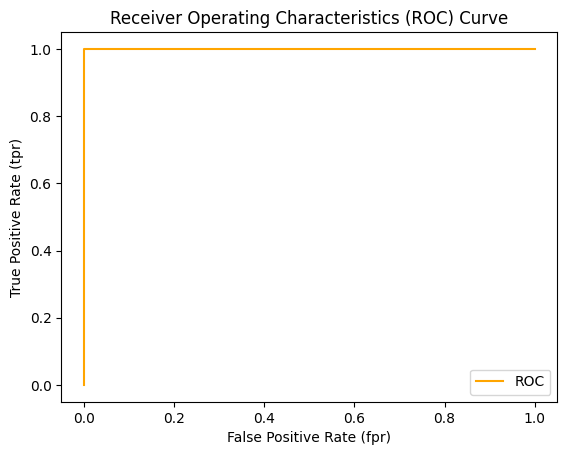

In [78]:
#plot perfect ROC Curve and AUC score

fpr , tpr , thresholds = roc_curve(y_test , y_test)
plot_roc_curve(fpr , tpr)

In [79]:
#perfect AUC Score

roc_auc_score(y_test ,y_test)

1.0

# **Confusion Matrix**

A confusion matrix is a quick way to compare the labels a models predict and the actual labels it was supposed to predict.

In essence , giving you an idea of where the model is getting confused.

In [80]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(x_test)

confusion_matrix(y_test , y_preds)

array([[24,  5],
       [ 4, 28]], dtype=int64)

In [81]:
#Visualise confusion matrix with pd.crosstab()

pd.crosstab(y_test ,  
            y_preds,
            rownames= ["Actual Labels"],
            colnames= ["Predicted Labels"] )

Predicted Labels,0,1
Actual Labels,,
0,24,5
1,4,28


<Axes: >

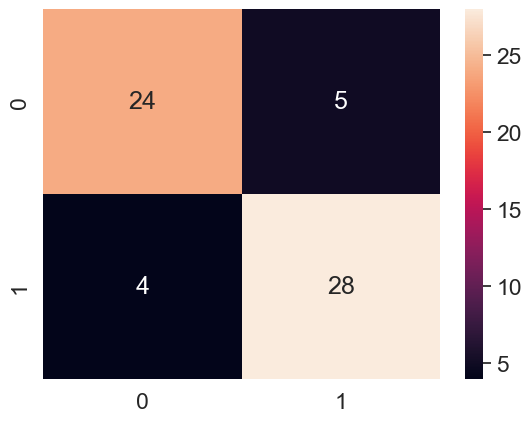

In [82]:
#Make our confusion matrix more visual with seaborn's heatmap()

import seaborn as sns

# set the font scale
sns.set(font_scale=1.5)

#Create a confusion matrix

conf_mat = confusion_matrix(y_test , y_preds)

#plot it using seaborn

sns.heatmap(conf_mat,
            annot=True)

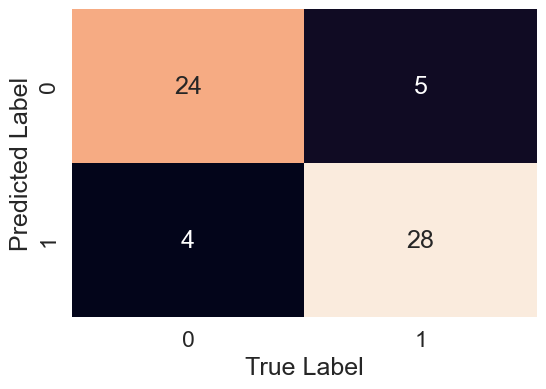

In [83]:
def plot_conf_mat(conf_mat):
    '''
    Plot a confusion matrix using seaborn heatmap()
    '''
    
    fig , ax = plt.subplots(figsize = ( 6, 4))
    ax = sns.heatmap(conf_mat ,
                     annot= True,
                     cbar = False)
    
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")
    
plot_conf_mat(conf_mat)    

# **Classification Report**

In [84]:
from sklearn.metrics import classification_report

print(classification_report(y_test , y_preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [85]:
#where precision and recall become valuable

disease_true = np.zeros(10000)
disease_true[0] = 1 # only one positive case

disease_preds = np.zeros(10000) # model predicts every case as 0

pd.DataFrame(classification_report(disease_true ,
                                   disease_preds,
                                   output_dict = True))

c:\python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


To summarize classification metrics:

* Accuracy : is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1)
* Precision and recall become more important when classes are imbalanced
* if false positive predictions are worse than false negatives , aim for higher precision
* if false negative predictions are worse than false positives , aim for higher recall
* F1-Score is a combination of precision and recall

# **4 . 2 . 2 Regression model evaluation metrics**

1 . R^2 (pronounced r-squared) or coefficient of determination

2 . Mean Absolute Error (MAE)

3 . Mean Squared Error (MSE)

# **R^2**

What R-Squared does : compares your model predictions to the mean of the target. Values can range from negative infinity (a very poor model) to 1. For example , if all your model does is predict the mean of the targets , it's R^2 value would be 0.
And if your model perfectly predicts a range of numbers it's R^2 value would be 1.

In [86]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x = housing_df.drop('target' , axis= 1)
y = housing_df['target']

x_train , x_test , y_train , y_test =  train_test_split (x, y, 
                                                         test_size=0.2)

model = RandomForestRegressor()

model.fit(x_train , y_train)


RandomForestRegressor()

In [87]:
model.score(x_test, y_test)

0.8059837014172988

In [88]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test) , y_test.mean())

In [89]:
y_test.mean()

2.0550030959302323

In [90]:
y_test_mean

array([2.0550031, 2.0550031, 2.0550031, ..., 2.0550031, 2.0550031,
       2.0550031])

In [91]:
r2_score(y_test ,y_test_mean)

0.0

In [92]:
r2_score(y_test , y_test)

1.0

# **Mean Absolute Error**

MAE is the average of the absolute differences between predictions and actual values . It gives you an idea of how wrong your predictions are.

In [93]:
# Mean Absolute Error

from sklearn.metrics import mean_absolute_error

y_preds = model.predict(x_test)

mae = mean_absolute_error(y_test , y_preds)
mae

0.32672061405038777

In [94]:
df = pd.DataFrame(data = {"actual values" : y_test ,
                          "predicted values" : y_preds})

df['difference'] = df["predicted values"] - df["actual values"]
df

,actual values,predicted values,difference
20046,0.47700,0.499090,0.022090
3024,0.45800,0.748150,0.290150
15663,5.00001,4.933456,-0.066554
20484,2.18600,2.569780,0.383780
9814,2.78000,2.346900,-0.433100
...,...,...,...
15362,2.63300,2.209870,-0.423130
16623,2.66800,1.938190,-0.729810
18086,5.00001,4.835158,-0.164852
2144,0.72300,0.717780,-0.005220


# **Mean Squared Error**

In [95]:
#Mean squared error
from sklearn.metrics import mean_squared_error

y_preds = model.predict(x_test)
mse = mean_squared_error(y_test , y_preds)
mse

0.2542406995878388

In [96]:
#calculate MSE by hand

sqaured = np.square(df['difference'])
sqaured.mean()


0.2542406995878388

# **4 . 2 . 3 Finally using the 'scoring' parameter**

In [97]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(5)

x = heart_disease.drop('target'  , axis=1)
y = heart_disease.target

x_train , x_test , y_train, y_test = train_test_split(x , y , test_size=0.2)

clf = RandomForestClassifier()

clf.fit(x_train , y_train)

RandomForestClassifier()

In [98]:
np.random.seed(5)
cv_acc = cross_val_score(clf , x , y , scoring=None)
cv_acc

array([0.81967213, 0.8852459 , 0.81967213, 0.8       , 0.76666667])

In [99]:
#Cross-validated accuracy 
print(f"The cross-validated accuracy : {np.mean(cv_acc) *100:.2f}%")

The cross-validated accuracy : 81.83%


In [100]:
np.random.seed(5)
cv_acc = cross_val_score(clf , x , y , scoring='accuracy')
print(f"The cross-validated accuracy : {np.mean(cv_acc) *100:.2f}%")

The cross-validated accuracy : 81.83%


In [101]:
#Pecision
cv_precision = cross_val_score(clf, x, y , scoring='precision')
np.mean(cv_precision)

0.8221272951224016

In [102]:
#Recall
cv_recall = cross_val_score(clf, x, y, scoring='recall')
np.mean(cv_recall)

0.8606060606060607

In [103]:
#F1 Score
cv_f1_score = cross_val_score(clf ,x, y , scoring = 'f1')
np.mean(cv_f1_score)

0.8434615692767867

How about our regression model?

In [104]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(5)

x = housing_df.drop('target' , axis=1)
y = housing_df.target

model = RandomForestRegressor()

In [105]:
np.random.seed(5)
cv_r2 = cross_val_score(model , x, y , scoring=None)
np.mean(cv_r2)

0.6481172266305295

In [106]:
np.random.seed(5)
cv_r2 = cross_val_score(model , x, y , scoring="r2")
cv_r2

array([0.49515042, 0.70401873, 0.74118345, 0.62328515, 0.67694839])

In [107]:
#Mean Absolute Error

cv_mae = cross_val_score(model , x, y, scoring = "neg_mean_absolute_error") 
np.mean(cv_mae)

-0.4652211267199613

In [108]:
#Mean Squared Error
cv_mse = cross_val_score (model , x, y , scoring = "neg_mean_squared_error")
cv_mse

array([-0.52763198, -0.34899059, -0.37392336, -0.44026921, -0.46087866])

# **4 . 3 Using different evalution metrics as Scikit-learn functions**

Classification evaluation functions

In [109]:
from sklearn.metrics import accuracy_score , precision_score , f1_score , recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(5)

x = heart_disease.drop('target' , axis=1)
y = heart_disease.target

x_train , x_test , y_train , y_test = train_test_split ( x , y, test_size = 0.2)

clf = RandomForestClassifier()
clf.fit(x_train , y_train)

y_preds = clf.predict(x_test)

#Evaluate the classifier

print("Classifier metrics on the test set")
print(f"Accuracy : {accuracy_score(y_test , y_preds)*100:.2f}%")
print(f"Precision : {precision_score(y_test , y_preds)*100:.2f}")
print(f"Recall : {recall_score(y_test , y_preds)*100:.2f}")
print(f"F1 : {f1_score(y_test , y_preds)*100:.2f}")



Classifier metrics on the test set
Accuracy : 88.52%
Precision : 85.29
Recall : 93.55
F1 : 89.23


Regression Evaluation Functions

In [110]:
from sklearn.metrics import r2_score ,mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(5)

x = housing_df.drop('target' , axis =1)
y = housing_df.target

x_train , x_test , y_train , y_test = train_test_split( x, y, test_size = 0.2)

model = RandomForestRegressor()
model.fit(x_train , y_train)

y_preds = model.predict(x_test)

#Evaluate the regression model
print(f"Regression model metrics on the test set")
print(f"R^2 : {r2_score(y_test, y_preds)}")
print(f"MAE : {mean_absolute_error(y_test , y_preds)}")
print(f"MSE : {mean_squared_error(y_test , y_preds)}")


Regression model metrics on the test set
R^2 : 0.8204318564416408
MAE : 0.328524704772287
MSE : 0.24774730234570416


# **5 .  Improving a Model**

* First predictions = baseline predictions
* First model = baseline model

From a data perspective :

   * Could we collect more data ? (generally , the more the data , the better)

   * Could we improve our data ?

From a model perspective :

   * Is there a better model we could use ?

   * Could we improve the current model ?

   Parameters vs. Hyperparameters

   * Parameters = models find these patterns in data

   * Hyperparameters = settings on a model you can adjust to (potentially) improve its ability to find patterns


Three ways to adjust hyperparameters :

1 . By hand

2 . Randomly with RandomSearchCV

3 . Exhaustively with GridSearchCV

In [111]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

In [112]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

# **5 . 1 Tuning Hyperparameters by hand**

Let's make 3 sets training , validation and test .

In [113]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

We're going to try and adjust the following :

* `max_depth`

* `max_features`

* `min_samples_leaf`

* `min_samples_split`

* `n_estimators`

In [114]:
def evalute_preds (y_true , y_preds):
    ''' 
    Performs evalution comparison on y_true lables vs. y_preds lables on a
    classification model
    '''
    accuracy = accuracy_score(y_true , y_preds)
    precision = precision_score (y_true , y_preds)
    recall = recall_score(y_true , y_preds)
    f1 = f1_score(y_true , y_preds)
    
    metric_dict = {"accuracy" : round(accuracy , 2) ,
                   "precision" : round(precision , 2), 
                   "recall" : round(recall , 2),
                   "f1" : round(f1 , 2)}
    
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    
    return metric_dict

In [115]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(5)


#shuffle the data

heart_disease_shuffled = heart_disease.sample(frac=1)

# Split x and y

x = heart_disease_shuffled.drop('target' , axis=1)
y = heart_disease_shuffled.target

# Split the data into train , validation and test sets

train_split = round( 0.7 * len(heart_disease_shuffled)) # 70% of data
validation_split = round( train_split + 0.15 * len(heart_disease_shuffled)) # 15% of data

x_train , y_train = x[:train_split] , y[:train_split]
x_validation , y_validation =  x[train_split:validation_split] , y[train_split:validation_split]
x_test , y_test = x[validation_split:] , y[validation_split:]


clf = RandomForestClassifier()
clf.fit(x_train ,y_train)

# Make baseline Predictions
y_preds = clf.predict(x_validation)

#Evaluate the classifier on validation set
baseline_metrics = evalute_preds(y_validation , y_preds)
baseline_metrics

Acc: 84.44%
Precision: 0.78
Recall: 0.90
F1 Score: 0.84


{'accuracy': 0.84, 'precision': 0.78, 'recall': 0.9, 'f1': 0.84}

In [116]:
np.random.seed(5)

# Create a 2nd classifier with different hyperparameters

clf_2 = RandomForestClassifier(n_estimators=200)
clf_2.fit(x_train, y_train)

#Make Prediction with different hyperparameters
y_preds_2 = clf_2.predict(x_validation)

#Evaluate the 2nd classifier 
clf_2_metrics = evalute_preds(y_validation , y_preds_2)

Acc: 86.67%
Precision: 0.82
Recall: 0.90
F1 Score: 0.86


# **5 . 2 Hyperparameter tuning with RandomizedSearchCV**

In [117]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators" : [10 , 100, 200 , 500 , 1000 , 1200],
        "max_depth" : [None , 5, 10, 20 , 30],
        "max_features" : [ "auto" , "sqrt"] ,
        "min_samples_split" : [2 , 4, 6],
        "min_samples_leaf"  : [1 , 2 , 4]}

np.random.seed(5)

#split into x and y 
x = heart_disease_shuffled.drop('target' , axis=1)
y = heart_disease_shuffled.target

#Split into train and test set

x_train , x_test , y_train , y_test = train_test_split ( x , y , test_size= 0.2)

#Instantiate classifier
clf = RandomForestClassifier(n_jobs= 1)

# Setup RandomizedSearchCV

rs_clf = RandomizedSearchCV(estimator=clf ,
                            param_distributions= grid,
                            n_iter= 10  , # number of models try
                            cv = 5 ,
                            verbose=2,
                            ) 

#Fit the RandomizedSearchCV version of clf
rs_clf.fit(x_train , y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.4s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; tot

c:\python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
30 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "c:\python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\python312\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\python312\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\python312\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_pa

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [118]:
rs_clf.best_params_

{'n_estimators': 1200,
 'min_samples_split': 6,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 30}

In [119]:
#Make predictions with the best hyperparameters
rs_y_preds = rs_clf.predict(x_test)

#Evaluate the predictions
rs_metrics = evalute_preds(y_test , rs_y_preds)

Acc: 81.97%
Precision: 0.86
Recall: 0.78
F1 Score: 0.82


# **5 . 3 Hyperparameters with GridSearchCV**

In [120]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [121]:
grid_2 = {'n_estimators': [1000, 1200 , 1500],
          'max_depth': [30],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [6],
          'min_samples_leaf': [4]}

In [122]:
from sklearn.model_selection import GridSearchCV , train_test_split

np.random.seed(5)

#split into x and y 
x = heart_disease_shuffled.drop('target' , axis=1)
y = heart_disease_shuffled.target

#Split into train and test set

x_train , x_test , y_train , y_test = train_test_split ( x , y , test_size= 0.2)

#Instantiate classifier
clf = RandomForestClassifier(n_jobs= 1)

# Setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf ,
                      param_grid= grid_2,
                      cv = 5 ,
                      verbose=2,
                    ) 

#Fit the GridSearchCV version of clf
gs_clf.fit(x_train , y_train)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=1200; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=1200; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimato

c:\python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\python312\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\python312\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\python312\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_pa

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [30], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [4], 'min_samples_split': [6],
                         'n_estimators': [1000, 1200, 1500]},
             verbose=2)

In [123]:
gs_clf.best_params_

{'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 6,
 'n_estimators': 1200}

In [124]:
gs_y_preds = gs_clf.predict(x_test)

# Evaluate the predictions
gs_metrics = evalute_preds(y_test , gs_y_preds)

Acc: 81.97%
Precision: 0.86
Recall: 0.78
F1 Score: 0.82


Let's compare our different models metrics

<Axes: >

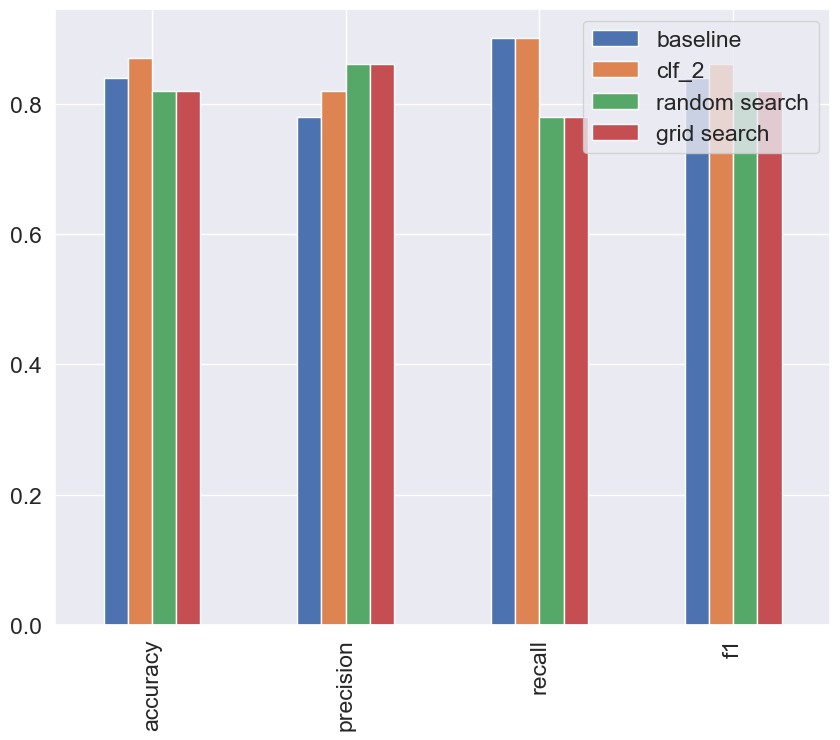

In [125]:
compare_metrics = pd.DataFrame ({"baseline" : baseline_metrics ,
                                 "clf_2" : clf_2_metrics,
                                 "random search" : rs_metrics,
                                 "grid search" : gs_metrics})
compare_metrics.plot.bar(figsize = (10 , 8))

6 . Saving and loading machine learning models

Two ways to save and load a machine learning model

1 . With Python's `pickle` module

2 . With the `joblib` module


**Pickle**

In [126]:
import pickle

# Save an existing module to file
pickle.dump(gs_clf, open("gs_random_forest_model_1.pkl" , "wb"))

In [127]:
# Load a saved model
loaded_pickle_model = pickle.load(open("gs_random_forest_model_1.pkl" , "rb"))

In [128]:
#Make some predictions
pickle_y_preds = loaded_pickle_model.predict(x_test)
evalute_preds(y_test , pickle_y_preds)

Acc: 81.97%
Precision: 0.86
Recall: 0.78
F1 Score: 0.82


{'accuracy': 0.82, 'precision': 0.86, 'recall': 0.78, 'f1': 0.82}

**Joblib**

In [129]:
from joblib import dump , load

#Save a model to a file
dump(gs_clf , filename = "gs_random_forest_model_1.joblib")

['gs_random_forest_model_1.joblib']

In [130]:
# Import a saved joblib model

loaded_joblib_model = load(filename = "gs_random_forest_model_1.joblib")

In [131]:
#Make and evaluate joblib predictions
joblib_y_preds = loaded_joblib_model.predict(x_test)
evalute_preds(y_test , joblib_y_preds)

Acc: 81.97%
Precision: 0.86
Recall: 0.78
F1 Score: 0.82


{'accuracy': 0.82, 'precision': 0.86, 'recall': 0.78, 'f1': 0.82}

# **7 . Putting it all together**

In [132]:
data = pd.read_csv("car-sales-extended-missing-data.csv")
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [133]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [134]:
data.isnull().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

Steps we want to do (all in one cell):

`1 . Fill missing data`

`2. Convert data into numbers`

`3. Build a model on the data`

In [139]:
# Getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split , GridSearchCV

# Setup random seed
import numpy as np
np.random.seed(5)

# Import data and drop rows with missing values
data = pd.read_csv("car-sales-extended-missing-data.csv")
data.dropna(subset = ["Price"] , inplace = True)

# Define different features and transformer pipeline
categories_features = ["Make" , "Colour"]
categories_transformer = Pipeline( steps = [
    ("imputer" , SimpleImputer(strategy = "constant" , fill_value = "missing")),
    ("onehot" , OneHotEncoder(handle_unknown = "ignore"))
    ])

door_feature = ['Doors']
door_transformer = Pipeline( steps = [
    ("imputer" , SimpleImputer(strategy = "constant" , fill_value = 4))
])

numeric_features = ["Odometer (KM)"]
numeric_transformer = Pipeline (steps = [
    ("imputer" , SimpleImputer (strategy = "mean"))
])

# Setup preprocessing steps ( fill missing values , then convert to numbers )
preprocessor = ColumnTransformer ( transformers = [
                                                   ("cat" , categories_transformer , categories_features),
                                                   ("door" , door_transformer , door_feature),
                                                   ("num" , numeric_transformer , numeric_features)
                                ])

# Create a preprocessing and modelling pipeline
model = Pipeline ( steps = [("preprocessor"  , preprocessor),
                            ("model" , RandomForestRegressor())])

# split data

x = data.drop("Price" , axis =1)
y = data['Price']

x_train , x_test , y_train , y_test = train_test_split ( x , y , test_size = 0.2)

# Fit and Score the model
model.fit(x_train , y_train)
model.score (x_test ,y_test)




0.27708410765338576

In [151]:
# Use GridSearchCV with our regression Pipeline

pipe_grid = {
    "preprocessor_num_imputer_strategy" : ["mean" , "median"],
    "model_n_estimator" : [100, 1000],
    "model_max_depth" : [None , 5],
    "model_max_features" : ["auto"],
    "model_min_samples_split" : [2 , 4]
}

gs_model = GridSearchCV (model , pipe_grid,cv=5, verbose=2)
gs_model.fit(x_train , y_train)


Fitting 5 folds for each of 16 candidates, totalling 80 fits


ValueError: Invalid parameter 'model_max_depth' for estimator Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Make', 'Colour']),
                                                 ('door',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=4,
                                                                                 strategy='constant'))]),
                                                  ['Doors']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['Odometer (KM)'])])),
                ('model', RandomForestRegressor())]). Valid parameters are: ['memory', 'steps', 'verbose'].

Fitting 5 folds for each of 16 candidates, totalling 80 fits


ValueError: Invalid parameter 'model_max_depth' for estimator Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Make', 'Colour']),
                                                 ('door',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=4,
                                                                                 strategy='constant'))]),
                                                  ['Doors']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['Odometer (KM)'])])),
                ('model', RandomForestRegressor())]). Valid parameters are: ['memory', 'steps', 'verbose'].